<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/99.Machine_Learning/14_clustering___kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Medidas-de-similitud" data-toc-modified-id="Medidas-de-similitud-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Medidas de similitud</a></span></li><li><span><a href="#Tipos-de-Clustering" data-toc-modified-id="Tipos-de-Clustering-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tipos de Clustering</a></span></li></ul></li><li><span><a href="#Clustering-particional" data-toc-modified-id="Clustering-particional-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering particional</a></span><ul class="toc-item"><li><span><a href="#K-medias" data-toc-modified-id="K-medias-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>K-medias</a></span></li><li><span><a href="#Iteración-1" data-toc-modified-id="Iteración-1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Iteración 1</a></span></li><li><span><a href="#Iteración-2" data-toc-modified-id="Iteración-2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Iteración 2</a></span></li><li><span><a href="#Scikit-learn.-K-means" data-toc-modified-id="Scikit-learn.-K-means-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Scikit-learn. K-means</a></span></li><li><span><a href="#Selección-del-número-de-clusters.-Técnica-del-codo" data-toc-modified-id="Selección-del-número-de-clusters.-Técnica-del-codo-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Selección del número de clusters. Técnica del codo</a></span></li><li><span><a href="#Recomendaciones-para-K-means" data-toc-modified-id="Recomendaciones-para-K-means-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Recomendaciones para K-means</a></span></li></ul></li></ul></div>



---

# Aprendizaje no supervisado

Los algoritmos de aprendizaje no supervisado son aquellos que aprenden de un dataset sin etiquetas, es decir, que no tiene ejemplos con los que comparar. Lo que hacen estos algoritmos es categorizar los datos en función de algún criterio estadístico. Recordemos que esto es distinto al aprendizaje supervisado, donde los algoritmos aprenden ajustándose a unos ejemplos. Podemos diferenciar varios usos de aprendizaje no supervisado:


- Clustering: agrupar los datos en grupos basados en la alguna medida de similitud entre los miembros de cada grupo. Las ventajas del clustering radican en descubrir grupos donde antes no se sabía que los había (p.ej. detectar clientes que llaman o naveguen en los mismo horarios y quizá ofrecer una tarifa distinta). Aplicaciones:
    - Agrupar clientes con gustos similares (segmentación que podría usarse para ofrecer distinta publicidad a cada uno)
    - Categorizar productos similares en función del uso que les dan los clientes 
    - Análisis de redes sociales (agrupas seguidores de Telefónica en twitter en lovers o haters en función de las palabras que usan cuando mencionan a Telefónica)
- Reducción dimensional
- Detección de outliers
- ...



---

## Clustering

Como decíamos, el objetivo es dividir los datos en grupos de tal forma que los miembros de los grupos sean más parecido entre ellos (alta similaridad intra-cluster), que lo son con los otros grupos (baja similaridad entre-clusters). Es importante hacer notar que el clustering es un proceso cuyo resultado es interpretado de manera subjetiva. El agrupamiento resultante de un algoritmo puede ser un desastre en una aplicación y maravilloso en otra. Esta es otra diferencia con aprendizaje supervisado, donde siempre nos interesa que nuestro algoritmo realice predicciones de la manera más fiable. Cosas importantes a definir en clustering son: 

- ¿Cómo agrupar los datos?
- ¿Cuándo consideramos que están relacionados?
- ¿Cuántos grupos queremos?



---

### Medidas de similitud

Decidir cuando dos elementos son similares es complicado. Normalmente se usan instancias de la distancia de Minkowski:

$ d(a, b) = \sum_{i = 1}^{n}{(\mid a_i - b_i \mid^p})^{\frac{1}{p}}$

donde si:
- $p = 2$ tenemos la distancia Euclídea, 
- $p = 1$ es la distancia Manhattan 



---

### Tipos de Clustering

Existen muchs algoritmos de clustering, entre ellos:

- **Jerárquicos**, en ellos los datos se agrupan de manera arborescente. Pueden ser top-down (divisivos) o bottom-up (aglomerativos). Ejemplo: dendogramas por  estimación de distancias.

- **No jerárquicos**, generan particiones a un sólo nivel, también llamados de particionado y recolocación. Ejemplo: k-means. 

- **Paramétricos**, asumen que las densidades de probabilidad de los grupos tienen cierta forma paramétrica conocida (Gaussiana, por ejemplo) y los métodos se reducen a estimar esos parámetros. También llamados probabilísticos, son un grupo dentro de los no jerárquicos. Ejemplo: Expectation Maximization (EM) para Gaussian Mixture Models (GMM).
- **No paramétricos**, no asumen nada sobre el modo en el que se agrupan los datos. Son otro grupo dentro de los no jerárquicos. Ejemplo: k-means.

- **Basados en densidades**, usan como criterio la densidad de puntos (zonas densas separadas por zonas menos densas). Son útiles cuando los clusters tienen formas irregulares, están entrelazados o hay ruido en los datos.

- **Basados en rejillas**, Se usan en el caso en que los datos tienen estructuras de diversa granularidad. Consisten en dividir el espacio en rejillas a diferentes niveles.

- **Basados en restricciones**, Son métodos en los que mediante la inclusión de restricciones, reglas en base a las cuales los datos pertenecen a un grupo o a otro, se forman los clusters.

- **Algoritmos para Datos de Grandes Dimensiones**, entre ellos se encuentran el clustering subespacial y las técnicas de co-clustering.

- **Métodos basados en co-ocurrencia**, se sustentan en la ocurrencia simultánea de algunos datos categóricos.




---

## Clustering particional

### K-medias

K-Means es un método que permite crear *clusters* de datos numéricos (de una o varias dimensiones $x_1$, $x_2$, …, $x_n$). La entrada del sistema son las mediciones numéricas de interés y la salida son los centroides de los *clusters* resultantes y la asignación de cada dato a un *cluster* determinado.

Un **centroide** es el punto que se encuentra en el centro de un *cluster*, calculado como la media de las coordenadas de todos los puntos de ese *cluster*. El número de centroides (k) es definido según convenga.
Para definir la distancia entre puntos y entre centroides se suele utilizar la distancia euclídea.

Veamos un ejemplo:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="white")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
MAXN = 40
np.random.randn(MAXN, 2)  # Normal random distribution, 40 rows 2 columns

array([[-0.54628978,  1.71973239],
       [-0.29929456,  0.14781228],
       [-0.66313674, -0.25831664],
       [ 1.26789517, -0.54025834],
       [ 0.51360482,  0.01024666],
       [-0.7421819 , -1.63261923],
       [ 2.11612752,  1.07819041],
       [-2.01350872,  0.17777142],
       [-0.46219298,  0.30891322],
       [-0.30900867,  0.68522287],
       [ 0.67510038, -0.38605551],
       [ 0.97249406, -1.71066516],
       [ 1.42066339,  0.31021438],
       [-0.06214411, -0.07347081],
       [ 0.72201946,  0.16228487],
       [-0.6665562 , -0.64377478],
       [ 0.66569995, -0.2713283 ],
       [ 0.86406485,  0.38540913],
       [ 0.69480457, -0.98916698],
       [-1.65148627,  0.19745779],
       [-0.07424243, -0.15934632],
       [ 1.19677653, -0.12509891],
       [-0.63537322, -0.46754067],
       [ 0.5645386 , -0.20629337],
       [ 1.10841803, -1.34341087],
       [-0.10301598, -1.24131496],
       [ 0.0884388 , -2.26731319],
       [-0.11270062,  0.64834511],
       [ 0.21988213,



Para entender el método K-means vamos a generar un conjunto de datos ficticios a partir de tres distribuciones normales distintas. Luego vamos a obtener la solución con la biblioteca de machine learning Scikit-learn para posteriormente simular las primeras iteraciones del algorimo usando datos ficticios.



Generamos un conjunto de datos aleatorios a partir de tres distribuciones normales

In [3]:
MAXN = 40
np.random.seed(0)
features = np.concatenate(
    [1.25 * np.random.randn(MAXN, 2), 5 + 1.5 * np.random.randn(MAXN, 2)])
features = np.concatenate([features, [8, 3] + 1 * np.random.randn(MAXN, 2)])



Por control guardamos la distribución a la que pertenece cada punto.
En la práctica esto se descononce, y es lo que nos interesa descubrir.

In [4]:
group = np.concatenate([0 * np.ones((MAXN, 1)), np.ones((MAXN, 1))])
group = np.concatenate([group, 2 * np.ones((MAXN, 1))])



Visualizamos los datos
El método ravel() convierte el array a unidimensional

Text(0.5, 1.0, 'Original Data')

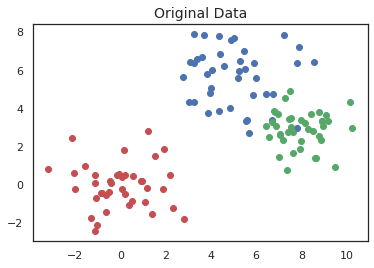

In [5]:
fig = plt.plot()
plt.scatter(features[(group == 0).ravel(), 0],
            features[(group == 0).ravel(), 1], color='r')
plt.scatter(features[(group == 1).ravel(), 0],
            features[(group == 1).ravel(), 1], color='b')
plt.scatter(features[(group == 2).ravel(), 0],
            features[(group == 2).ravel(), 1], color='g')
plt.title(u'Original Data', size=14)



### Iteración 1



Podemos simular proceso de convergencia de K-means paso a paso. Primero elegiriamos unos centroides y asociariamos todos los datos al centro más cercano.

In [6]:
from scipy.spatial.distance import cdist

In [7]:
K =  3 # Number of cluster

# 1. We select as initial centroids the first three elements of the dataset.

centroids  = features[:3,:] 



2. Calculamos la distancia (Euclídea) a los centroides

In [8]:
Y = cdist(features, centroids, 'euclidean')
Y # Shows an array with as many rows as features, and as many columns as centroids
# Each row shows the distance from each item to each of the centroids.

array([[ 0.        ,  2.50157064,  1.72664814],
       [ 2.50157064,  0.        ,  4.17332041],
       [ 1.72664814,  4.17332041,  0.        ],
       [ 1.22901474,  2.99052744,  1.54307696],
       [ 2.33412549,  2.65771556,  3.01303476],
       [ 2.41595918,  1.4336826 ,  3.72553354],
       [ 1.30119576,  2.66296331,  1.94939276],
       [ 1.65232756,  2.47600195,  2.41916258],
       [ 0.8284892 ,  3.12468603,  1.07212931],
       [ 2.39742925,  3.95720732,  1.94920412],
       [ 5.40559544,  4.84002549,  5.88975093],
       [ 1.8175401 ,  3.73155908,  1.28788306],
       [ 2.40279457,  4.89286185,  0.77999889],
       [ 2.26987858,  3.25144411,  2.48218713],
       [ 1.36741044,  1.18732042,  3.08679337],
       [ 2.01156904,  2.54595159,  2.73011379],
       [ 4.45484036,  5.76988064,  3.66549977],
       [ 2.65748838,  3.08861954,  3.11082228],
       [ 1.2044596 ,  1.33568144,  2.83863343],
       [ 2.82894699,  3.6085789 ,  2.94217631],
       [ 4.18773996,  5.23094443,  3.686



3. Asignamos cada punto a un cluster basado en la distancia anterior

In [9]:
clusters = np.argmin(Y,axis = 1)
clusters

array([0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

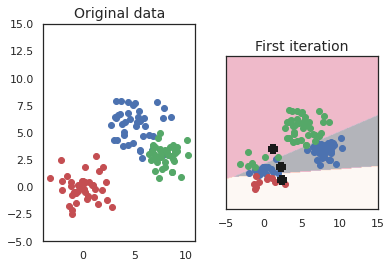

In [10]:
# We visualize the original data

f, (ax1, ax2) = plt.subplots(1,2, sharey = True)
ax1.scatter(features[(group == 0).ravel(),0],features[(group == 0).ravel(),1],color='r')
ax1.scatter(features[(group == 1).ravel(),0],features[(group == 1).ravel(),1],color='b')
ax1.scatter(features[(group == 2).ravel(),0],features[(group == 2).ravel(),1],color='g')
ax1.set_title('Original data',size=14)

# We visualize the results obtained so far

ax2.scatter(features[(clusters == 0).ravel(),0],features[(clusters == 0).ravel(),1],color='b')
ax2.scatter(features[(clusters == 1).ravel(),0],features[(clusters == 1).ravel(),1],color='g')
ax2.scatter(features[(clusters == 2).ravel(),0],features[(clusters == 2).ravel(),1],color='r')
ax2.plot(centroids[:,0],centroids[:,1],'k+', linewidth=2,zorder=10,markeredgewidth =10) # Here we color the centroids to stand out
ax2.set_title(u'First iteration',size=14)

# This code is for drawing the colored zones
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz = XX.shape
data = np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, centroids, 'euclidean')
Z = np.argmin(Y,axis = 1)

ax2.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)



Calculamos los nuevos centroides



4. Actualizamos los centroides

In [11]:
for i in range(K):
    centroids[i,:] = np.mean(features[clusters == i,:],axis = 0)

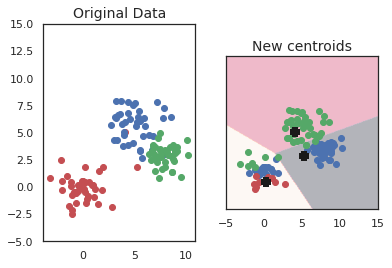

In [12]:
f, (ax1, ax2) = plt.subplots(1,2, sharey = True)
ax1.scatter(features[(group == 0).ravel(),0],features[(group == 0).ravel(),1],color='r')
ax1.scatter(features[(group == 1).ravel(),0],features[(group == 1).ravel(),1],color='b')
ax1.scatter(features[(group == 2).ravel(),0],features[(group == 2).ravel(),1],color='g')
ax1.set_title('Original Data',size=14)

# We visualize the new centroids

ax2.scatter(features[(clusters == 0).ravel(),0],features[(clusters == 0).ravel(),1],color='b')
ax2.scatter(features[(clusters == 1).ravel(),0],features[(clusters == 1).ravel(),1],color='g')
ax2.scatter(features[(clusters == 2).ravel(),0],features[(clusters == 2).ravel(),1],color='r')
ax2.plot(centroids[:,0],centroids[:,1],'k+', linewidth=2,zorder=10,markeredgewidth =10)
ax2.set_title(u'New centroids',size=14)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz = XX.shape
data = np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, centroids, 'euclidean')
Z = np.argmin(Y,axis = 1)

ax2.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)



### Iteración 2



Con los nuevos centroides repetimos la asignación de puntos a los centros más cercanos.



Recalculamos los clusters

In [13]:
Y = cdist(features, centroids, 'euclidean')
clusters = np.argmin(Y,axis = 1)



Visualizamos los datos originales

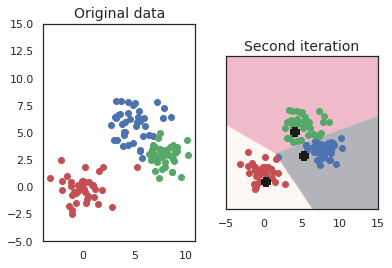

In [14]:
f, (ax1, ax2) = plt.subplots(1,2, sharey = True)
ax1.scatter(features[(group == 0).ravel(),0],features[(group == 0).ravel(),1],color='r')
ax1.scatter(features[(group == 1).ravel(),0],features[(group == 1).ravel(),1],color='b')
ax1.scatter(features[(group == 2).ravel(),0],features[(group == 2).ravel(),1],color='g')
ax1.set_title('Original data',size=14)

# We visualize the results obtained so far

ax2.scatter(features[(clusters == 0).ravel(),0],features[(clusters == 0).ravel(),1],color='b')
ax2.scatter(features[(clusters == 1).ravel(),0],features[(clusters == 1).ravel(),1],color='g')
ax2.scatter(features[(clusters == 2).ravel(),0],features[(clusters == 2).ravel(),1],color='r')
ax2.plot(centroids[:,0],centroids[:,1],'k+', linewidth=2,zorder=10,markeredgewidth =10)
ax2.set_title(u'Second iteration',size=14)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz = XX.shape
data = np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, centroids, 'euclidean')
Z = np.argmin(Y,axis = 1)

ax2.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)



Repetimos estos dos procesos hasta converger.



### Scikit-learn. K-means

La librería de machine learning Scikit-learn también nos permite hacer clustering usando el algoritmo K-means del módulo `cluster`. Vamos a resolver el ejemplo anterior usando el método de esta librería.

In [15]:
from sklearn import cluster

K = 3  # Number of clusters. This is a hyperparameter of the algorithm

# Create model instance
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)

clf.fit(features)  # Train the clustering model

clusters = clf.predict(features)
centroids = clf.cluster_centers_

print(clf, clusters, centroids, sep='\n\n')

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

[2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0
 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]

[[ 4.69299887  6.01459799]
 [-0.15519534 -0.16179386]
 [ 7.72483256  3.01686642]]




Visualizamos los resultados y comparamos con los valores reales

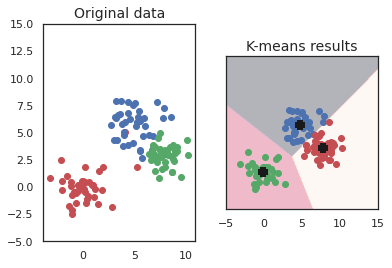

In [16]:
# Original data
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(features[(group == 0).ravel(), 0],
            features[(group == 0).ravel(), 1], color='r')
ax1.scatter(features[(group == 1).ravel(), 0],
            features[(group == 1).ravel(), 1], color='b')
ax1.scatter(features[(group == 2).ravel(), 0],
            features[(group == 2).ravel(), 1], color='g')
ax1.set_title('Original data', size=14)

# K-means
ax2.scatter(features[(clusters == 0).ravel(), 0],
            features[(clusters == 0).ravel(), 1], color='b')
ax2.scatter(features[(clusters == 1).ravel(), 0],
            features[(clusters == 1).ravel(), 1], color='g')
ax2.scatter(features[(clusters == 2).ravel(), 0],
            features[(clusters == 2).ravel(), 1], color='r')
ax2.plot(centroids[:, 0], centroids[:, 1], 'k+',
         linewidth=2, zorder=10, markeredgewidth=10)
ax2.set_title(u'K-means results', size=14)

x = np.linspace(-5, 15, 200)
XX, YY = np.meshgrid(x, x)
sz = XX.shape
data = np.c_[XX.ravel(), YY.ravel()]

# We predict/assign a cluster to each new observation/point
Z = clf.predict(data)

ax2.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower',
           extent=(-5, 15, -5, 15), alpha=0.3, vmin=0, vmax=K - 1)



---

### Selección del número de clusters. Técnica del codo

Elegir el número de clusters a priori puede ser adecuado para algunas apliaciones, pero no para todas. Si no se quiere recurrir a la selección manual, se puede aplicar la técnica del codo. Para ello hay que definir una noción de compacticidad.

Como medida de compacticidad se suele usar distancia intracluster conocida como *Within Sum of Squares (WSS)*. WWS se define como la suma de los cuadrados de la distancia de cada punto de un cluster a su centroide. Esta magnitud nos dará una medida de lo bien o mal que los *clusters* obtenidos representan a los datos, y se expresa como:

$WSS = \sum_{i = 1}^{K}\sum_{j = 1}^{n_i}{\mid x_{ij} - c_i\mid}^2$

donde:

- $K$, es el número de centroides
- $n_i$, es el número de elementos que pertenecen al centroide $i$
- $c_i$, centroide del cluster $i$
- $x_{ij}$, elemento $j$ del cluster $i$

Para seleccionar el valor de K adecuado, se calcula el WSS obtenido al ejecutar el algoritmo K-means con distintos valores de K y se representa gráficamente. A partir de la figura se selecciona el valor de K a partir del cual la pendiente de la curva es cercana a cero.  

Hagamos ese análisis de distancias con el ejemplo anterior, analizando las distancias al incrementar el número de clusters.

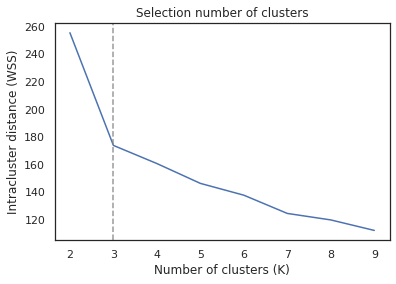

In [17]:
from scipy.spatial import distance
from sklearn import cluster

d = []
for K in range(2, 10):

    clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
    clf.fit(features)
    
    # We do iterations with several numbers of clusters, to calculate the WSS for each one
    clusters = clf.predict(features)

    p = []
    for i in range(K):
        p.append(np.sum(distance.cdist(features[clusters == i, :], [
                 clf.cluster_centers_[i]], 'euclidean')))
        # 1. We calculate the distance of the data belonging to each cluster with its corresponding centroid.
        # 2. We make the sum for all the data that belong to that centroid.
        # 3. It is added again for all the centroids that there are.
    d.append(np.sum(p))


plt.plot(np.arange(2, 10), d)
plt.ylabel(u'Intracluster distance (WSS)')
plt.xlabel(u'Number of clusters (K)')
plt.title(u'Selection number of clusters')

plt.axvline(x=3, linestyle='--', c='gray', alpha=0.8)



En la figura anterior se observa que la diferencia de WSS disminuye a partir de K igual a tres. Podemos seleccionar k = 3 ó k = 4 y realizar un análisis más detallado basado en conocimiento experto de los datos.

En general este proceso no es sencillo y hay que tener en cuenta que K-medias es muy sensible a diferencias en las varianzas de las características y a características medidas en escalas muy distintas.



---

### Recomendaciones para K-means

Nuestra recomendación es normalizar las variables antes de hacer K-medias. La normalización más sencilla y que incrementaría la eficacia del algoritmo sería:

1. Calcular la media y la desviación típica de cada variable
2. Restar a cada variable su media y dividirla por la desviación típica

Con esto conseguimos que todas las variables tengan media igual a cero y desviación típica igual a uno. Distintas normalizaciones tienen distintos problemas:

- Normalizar cada variable entre el máximo y el mínimo de cada variable: Cuando se normalizan los datos entre sus límites empíricos, el ruido de la señal puede verse amplificado. Por ejemplo, una señal plana con algo de ruido, resultaría en una señal normalizada donde el ruido ha sido ampliamente amplificado.

- Estandarizar (Z-score, restar la media y dividir por la desviación típica): Los outliers pueden atenuar la señal debido a la sensibilidad de la media y de la desviación típica a outliers. Imagina una señal senoidal con un outlier muy grande. Cuando la señal se normalice, la senoidal se atenuará tanto que no se apreciará, ya que la desviación típica será muy grande. 

- Normalizar cada variable entre el máximo y el mínimo de todas las variables: Se pueden producir los dos problemas anteriores.

- Normalización entre los límites físicos de la variable: Esta normalización implica que el analista tiene un conocimiento previo de los límites de cada característica. En algunos casos esto puede no ser cierto. Incluso aunque se supiesen, si la variable no tiene valores en todo el rango permitido, cuando la señal sea normalizada, se atenuarán los valores, perdiendo información


Otras recomendaciones serían: inicializar los centros con el resultado de otro algoritmo de clustering, o inicializar los centros usando como centro datos del dataset, en vez de puntos aleatorios.
